### skip-gramモデルの学習コード

In [1]:
include("../common/trainer.jl")
include("../common/optimizer.jl")
include("./simple_skip_gram.jl")
include("../common/util.jl")

convert_one_hot (generic function with 1 method)

In [2]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

1000

In [3]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

([1, 2, 3, 4, 5, 2, 6, 7], Dict{Any, Any}("say" => 2, "goodbye" => 3, "you" => 1, "hello" => 6, "." => 7, "and" => 4, "i" => 5), Dict{Any, Any}(5 => "i", 4 => "and", 6 => "hello", 7 => ".", 2 => "say", 3 => "goodbye", 1 => "you"))

In [4]:
vocab_size = length(word_to_id)
contexts, target = create_contexts_target(corpus, window_size=1)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

6×2×7 Array{Int32, 3}:
[:, :, 1] =
 1  0
 0  0
 0  0
 0  0
 0  0
 0  0

[:, :, 2] =
 0  0
 1  0
 0  0
 0  1
 0  0
 1  0

[:, :, 3] =
 0  1
 0  0
 1  0
 0  0
 0  0
 0  0

[:, :, 4] =
 0  0
 0  1
 0  0
 1  0
 0  0
 0  0

[:, :, 5] =
 0  0
 0  0
 0  1
 0  0
 1  0
 0  0

[:, :, 6] =
 0  0
 0  0
 0  0
 0  0
 0  1
 0  0

[:, :, 7] =
 0  0
 0  0
 0  0
 0  0
 0  0
 0  1

In [5]:
model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

Trainer(SimpleSkipGram(MatMul([[0.004913340360603353 -0.00514986196770427 … -0.006863644170527981 0.0028376812136208696; -0.0018065703977275228 0.006401378427497635 … 0.009775745939180886 -0.008084748128951501; … ; -0.0016869742630260954 0.0005614232752052628 … 0.005796512279622249 -0.0015132498909233758; 0.0118036466107688 0.001268059636644251 … -0.0013541361225795662 0.008452893247361051]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[0.009893127237660459 -0.012625685203599468 … 0.011830717172583804 -0.011754193350170111; -0.011226824237715836 0.01125658122053783 … -0.007726351428441985 -0.00702838053928534; … ; 0.007732638965489377 -0.018809128383643427 … 0.004031553394416415 -0.02551169768964377; -0.004853784639843703 -0.009425620942078642 … -0.004917745704895678 0.01420265237099228]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), SoftmaxWithLoss(Any[], Any[], #undef, #undef), So

In [6]:
fit!(trainer, contexts, target, max_epoch=max_epoch, batch_size=batch_size)

| epoch 0 | iter 1 / 2 | loss 11.68
| epoch 0 | iter 2 / 2 | loss 11.68
| epoch 10 | iter 2 / 2 | loss 11.67
| epoch 20 | iter 1 / 2 | loss 11.66
| epoch 20 | iter 2 / 2 | loss 11.65
| epoch 30 | iter 2 / 2 | loss 11.63
| epoch 40 | iter 1 / 2 | loss 11.58
| epoch 40 | iter 2 / 2 | loss 11.55
| epoch 50 | iter 2 / 2 | loss 11.48
| epoch 60 | iter 1 / 2 | loss 11.37
| epoch 60 | iter 2 / 2 | loss 11.24
| epoch 70 | iter 2 / 2 | loss 11.2
| epoch 80 | iter 1 / 2 | loss 11.1
| epoch 80 | iter 2 / 2 | loss 10.93
| epoch 90 | iter 2 / 2 | loss 10.9
| epoch 100 | iter 1 / 2 | loss 10.75
| epoch 100 | iter 2 / 2 | loss 10.42
| epoch 110 | iter 2 / 2 | loss 10.5
| epoch 120 | iter 1 / 2 | loss 10.23
| epoch 120 | iter 2 / 2 | loss 9.99
| epoch 130 | iter 2 / 2 | loss 10.03
| epoch 140 | iter 1 / 2 | loss 9.74
| epoch 140 | iter 2 / 2 | loss 9.56
| epoch 150 | iter 2 / 2 | loss 9.55
| epoch 160 | iter 1 / 2 | loss 9.24
| epoch 160 | iter 2 / 2 | loss 8.64
| epoch 170 | iter 2 / 2 | loss 9.08
| 

In [7]:
using Plots
gr()

Plots.GRBackend()

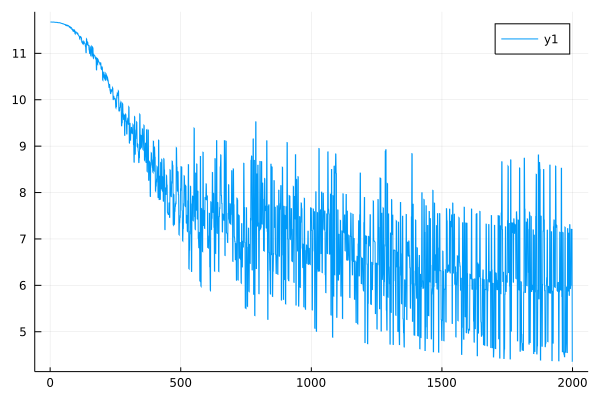

In [8]:
plot(trainer.loss_list)

#### MatMulレイヤの重みを表示

In [9]:
for (word_id, word) = id_to_word
    println("$(word) $(model.word_vecs[word_id, :])")
end

i [-0.0053841157166170574, -0.014135437170273973, -0.011936256706885792, 0.006958152598644025, 0.011628671057641649]
and [0.015168391875898761, -0.008098933585944804, 0.005473124381952238, 0.015909674096850818, -0.007122827674387242]
hello [-0.0016869742630260954, 0.0005614232752052628, 0.0004171327533832518, 0.005796512279622249, -0.0015132498909233758]
. [0.0118036466107688, 0.001268059636644251, -0.008833554153323072, -0.0013541361225795662, 0.008452893247361051]
say [-0.0018065703977275228, 0.006401378427497635, 0.005414586371001355, 0.009775745939180886, -0.008084748128951501]
goodbye [-0.007074532613834553, 0.02181587847417316, -0.01079710070272305, 0.008829484131558077, -0.001420517087645863]
you [0.004913340360603353, -0.00514986196770427, 0.012840311963252539, -0.006863644170527981, 0.0028376812136208696]
